  ## Leer el archivo CSV o Excel usando Pandas y mostrar las primeras 5 filas para entender la estructura del conjunto de datos.

In [71]:
from google.colab import files
import pandas as pd

# Subir un archivo python y acceder a el con pandas
uploaded = files.upload()
file_key = list(uploaded.keys())[0]
data = pd.read_excel(file_key)

# Aquí se imprimen las primeras cinco líneas del DataFrame
print("\nLas primeras cinco líneas del DataFrame son:\n")
print(data.head())

# el handler del archivo será "data".
# variable que será usada posteriormente en el programa

Saving notas.xlsx to notas (8).xlsx

Las primeras cinco líneas del DataFrame son:

   Matemática  Lenguaje  Ciencias  NEM  Colegio_Egreso Sexo  Nota  asi_Cod
0         626       607       578  660   Subvencionado    F   1.0   530024
1         705       651       638  641   Subvencionado    M   4.7   510145
2         590       581       451  641  Municipalizado    M   2.8   520145
3         700       710       588  721   Subvencionado    F   3.6   520145
4         693       645       575  641   Subvencionado    M   4.0   520145


## Realizar un análisis descriptivo básico (media, mediana, desviación estándar, etc.) para cada columna numérica.

In [72]:
# Realizar un análisis descriptivo
analisis_descriptivo = data.describe()

# Mostrar el análisis descriptivo
print("\nAnálisis descriptivo básico para columnas numéricas:\n")
print(analisis_descriptivo)



Análisis descriptivo básico para columnas numéricas:

        Matemática     Lenguaje     Ciencias          NEM         Nota  \
count  6879.000000  6879.000000  6879.000000  6879.000000  6879.000000   
mean    667.450938   614.717401   617.840965   643.715947     3.604274   
std      57.144068    62.700552    56.218732    77.285934     1.365651   
min     479.000000   393.000000   426.000000   420.000000     1.000000   
25%     629.000000   572.000000   581.000000   598.000000     2.600000   
50%     659.000000   613.000000   618.000000   659.000000     4.000000   
75%     695.000000   658.000000   653.000000   701.000000     4.500000   
max     851.000000   822.000000   837.000000   826.000000     7.000000   

             asi_Cod  
count    6879.000000  
mean   517767.368513  
std      7407.630390  
min    510145.000000  
25%    510145.000000  
50%    520145.000000  
75%    520145.000000  
max    530024.000000  


## Identificar los top 5 superiores y los top 5 inferiores de alguna de las categorías identificadas.

In [73]:
# Identificar los top 5 superiores e inferiores de una columna
columna_a_analizar = 'Matemática'

# Top 5 superiores
top5_superiores = data.nlargest(5, columna_a_analizar)

# Top 5 inferiores
top5_inferiores = data.nsmallest(5, columna_a_analizar)

# Mostrar los resultados
print("\nTop 5 superiores de", columna_a_analizar, ":\n")
print(top5_superiores)

print("\nTop 5 inferiores de", columna_a_analizar, ":\n")
print(top5_inferiores)

"""
el estudiante será identificado por su ID (primera columna numerica mostrada),
la cuál corresponde a la fila en el libro de excel que contiene su información.
Esto se aplicará en futuros calculos.
"""


Top 5 superiores de Matemática :

      Matemática  Lenguaje  Ciencias  NEM Colegio_Egreso Sexo  Nota  asi_Cod
2059         851       658       660  659        Privado    M   2.5   520145
3614         851       769       775  765  Subvencionado    M   5.3   510145
470          850       658       659  659        Privado    M   4.6   530024
745          850       601       685  454        Privado    M   4.9   520145
1028         850       619       610  619        Privado    M   4.4   530024

Top 5 inferiores de Matemática :

      Matemática  Lenguaje  Ciencias  NEM  Colegio_Egreso Sexo  Nota  asi_Cod
1070         479       484       517  702   Subvencionado    M   1.7   510145
1692         479       484       516  701   Subvencionado    M   1.9   520145
2849         479       482       516  703   Subvencionado    M   1.7   510145
2855         479       483       516  700   Subvencionado    M   1.9   520145
1066         529       464       487  682  Municipalizado    M   1.0   520145


## Calcular los totales acumulados para todas las categorías numéricas agrupados por el Item Clave (Excepto Cod. Asig) y ordenados de mayor a menor.

In [23]:
# Seleccionar columnas
columnas_numericas = data.select_dtypes(include='number').columns
columnas_agrupar = ['Sexo']

# Filtrar las columnas numéricas y de agrupación
data_numericas = data[columnas_agrupar + list(columnas_numericas.difference(['asi_Cod']))]

# Agrupar por "Sexo" y calcular los totales acumulados
totales_acumulados = data_numericas.groupby('Sexo').cumsum()

# Ordenar por el total acumulado más alto
totales_acumulados_sorted = totales_acumulados.sum(axis=1).sort_values(ascending=False)

# Mostrar los resultados
print("\nTotales acumulados para todas las categorías numéricas agrupados por 'Sexo' y ordenados de mayor a menor:\n")
print(totales_acumulados_sorted)



Totales acumulados para todas las categorías numéricas agrupados por 'Sexo' y ordenados de mayor a menor:

6877    14175201.6
6876    14172749.6
6875    14170101.2
6874    14167808.1
6873    14165353.9
           ...    
4           7463.5
3           5194.6
2           4905.5
1           2639.7
0           2472.0
Length: 6879, dtype: float64


## Visualizar los datos utilizando Matplotlib:

Se importará la librería matplotlib para la visualización de datos.

In [ ]:
import matplotlib.pyplot as plt

• Crear un gráfico de barras para mostrar los top 5 Superiores y otro para los top 5 inferiores de las categorías disponibles según el set de datos (máximo 6 gráficos).

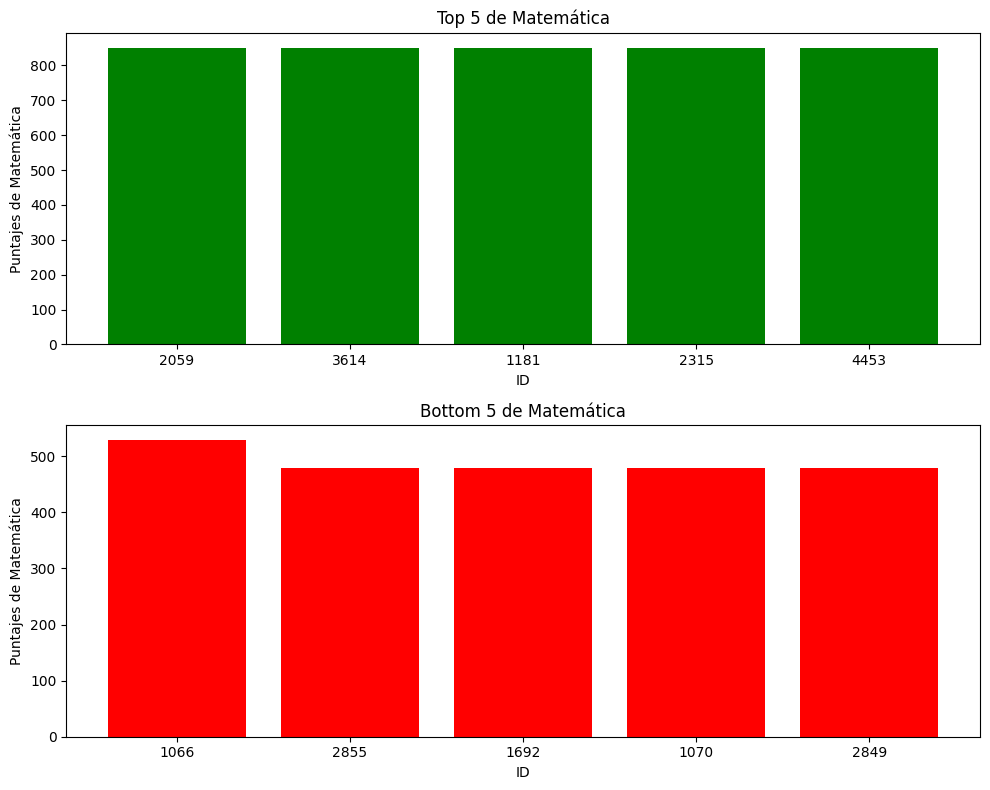

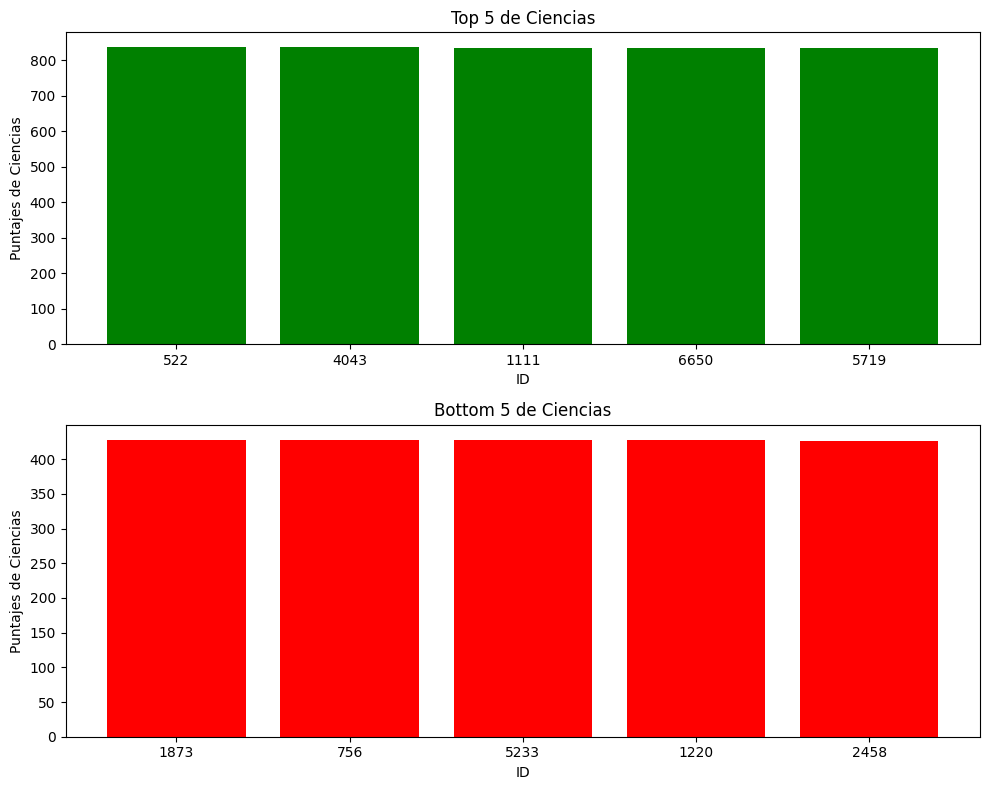

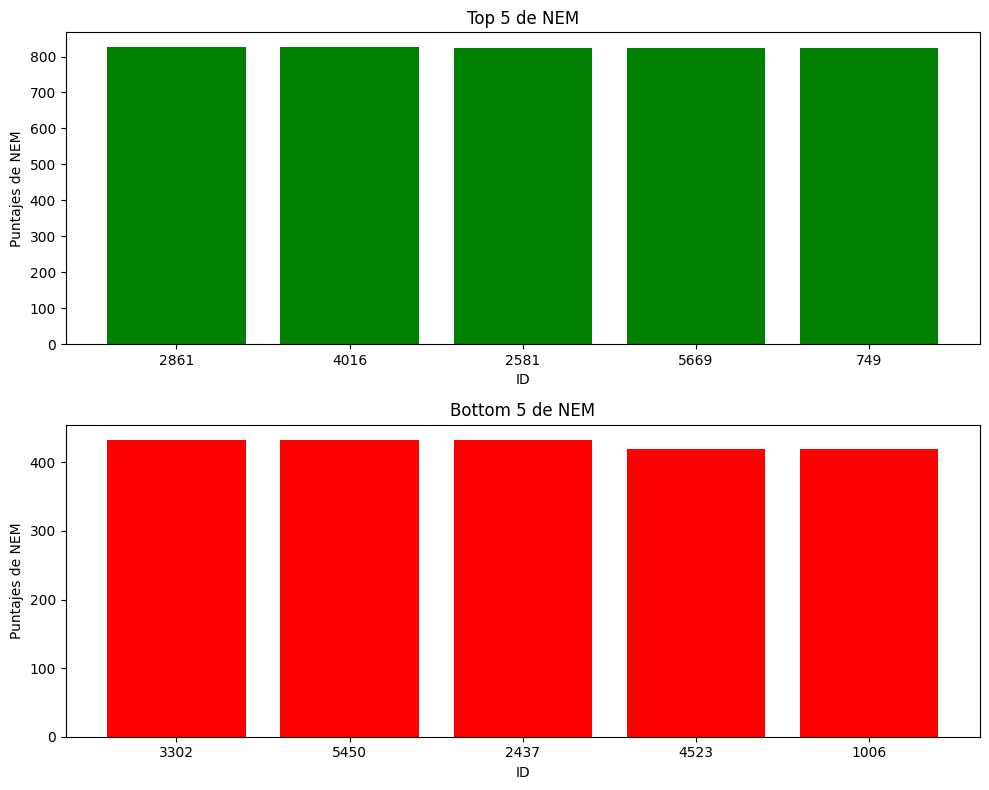

In [39]:
# Se define una función para crear dos gráficos, uno con los mejores 5 y otro con los peores 5.
def MostrarTopAndBottom5DeColumna(Columna):

  # Ordenar los datos de la columna de mayor a menor
  sorted_data = data.sort_values(by=Columna, ascending=False)

  # Seleccionar el top 5 y el bottom 5
  top_5 = sorted_data.head(5)
  bottom_5 = sorted_data.tail(5)

  # Para que el número de fila no interfiera con los cálculos, se usará como string
  # de esta forma se puede identificar al estudiante.

  top_5_index_str = top_5.index.astype(str)
  bottom_5_index_str = bottom_5.index.astype(str)

  # describiendo tamaño de la barra
  fig, axes = plt.subplots(2, 1, figsize=(10, 8))

  # Calculando y seleccionando al top 5
  axes[0].bar(top_5_index_str, top_5[Columna], color='green')
  axes[0].set_title('Top 5 de '+Columna)
  axes[0].set_ylabel('Puntajes de '+Columna)
  axes[0].set_xlabel('ID')

  # Calculando y seleccionando al bottom 5
  axes[1].bar(bottom_5_index_str, bottom_5[Columna], color='red')
  axes[1].set_title('Bottom 5 de '+Columna)
  axes[1].set_ylabel('Puntajes de '+Columna)
  axes[1].set_xlabel('ID')

  #mostrando los datos de la columna seleccionada
  plt.tight_layout()
  plt.show()

# Ejecutar la funcion de muestra con las siguientes categorías:

MostrarTopAndBottom5DeColumna("Matemática")
MostrarTopAndBottom5DeColumna("Ciencias")
MostrarTopAndBottom5DeColumna("NEM")


• Crear un gráfico de torta para mostrar alguna distribución de Items según categoría.

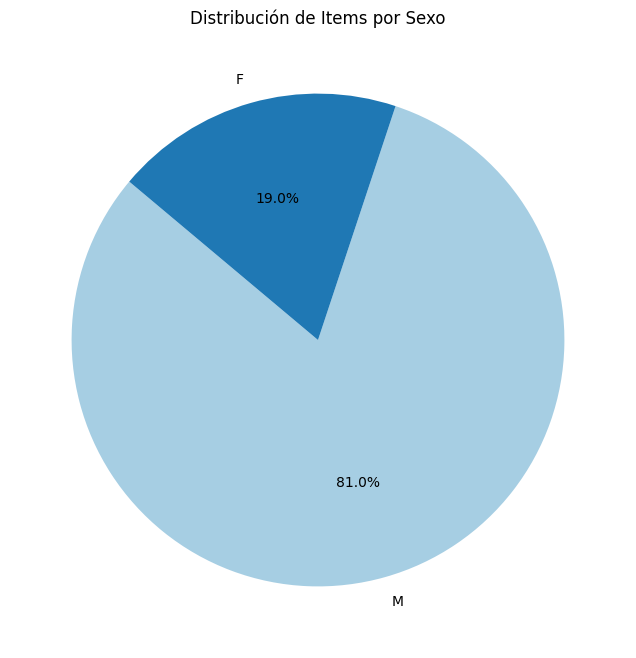

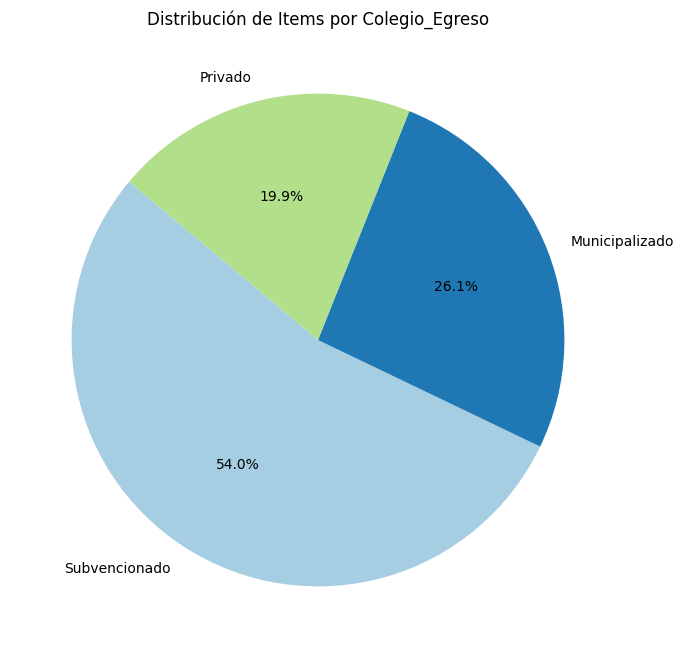

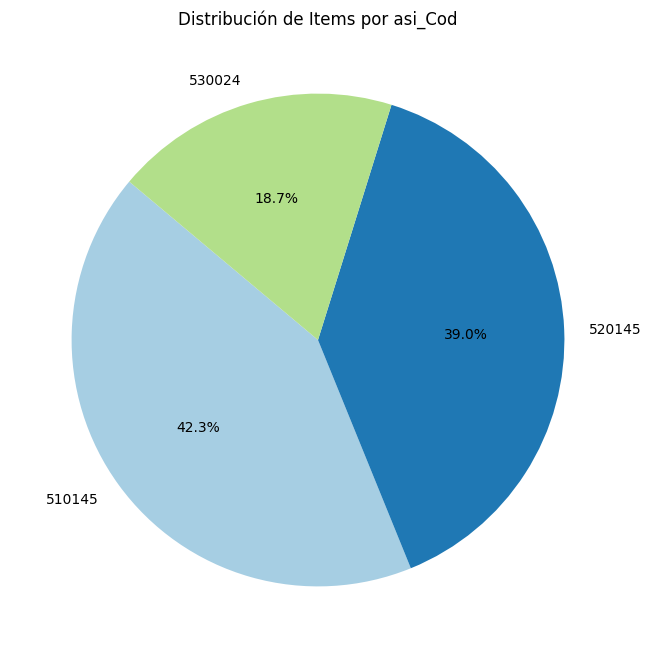

In [66]:
# Se define la función
def MostrarDistribucionDeItemsPorCategoria1(Categoria):
    # Cuenta las ocurrencias de cada item en la categoría selccionada.
    item_counts = data[Categoria].value_counts()

    # Estableciendo el gráfico torta
    plt.figure(figsize=(8, 8))
    plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Distribución de Items por '+Categoria)
    plt.show()

# Utilizando la función para las siguientes categorías:
MostrarDistribucionDeItemsPorCategoria1("Sexo")
MostrarDistribucionDeItemsPorCategoria1("Colegio_Egreso")
MostrarDistribucionDeItemsPorCategoria1("asi_Cod")


• Crea un gráfico de líneas comparativo que permita visualizar la evolución de alguna categoría numérica para al menos tres ítems distintos.

>> * Comentario: Esta parte no la entendí muy bien, por "evolución" entiendo que debe haber una variable de tiempo, la cuál no existe en los datos proporcionados, así que los gráficos no tendrán mucho sentido comparativo.

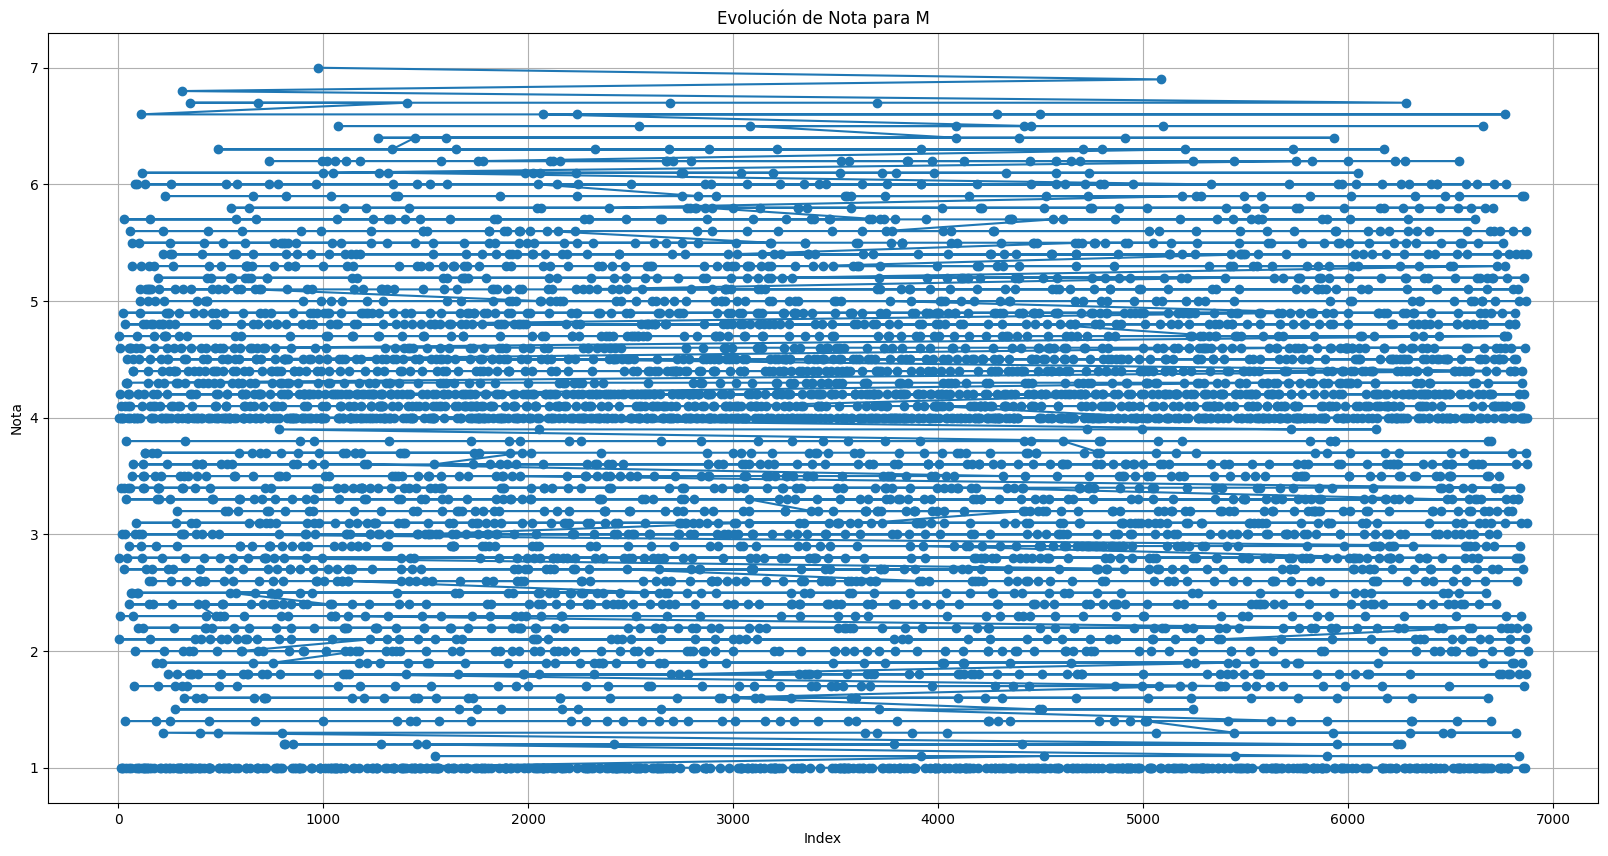

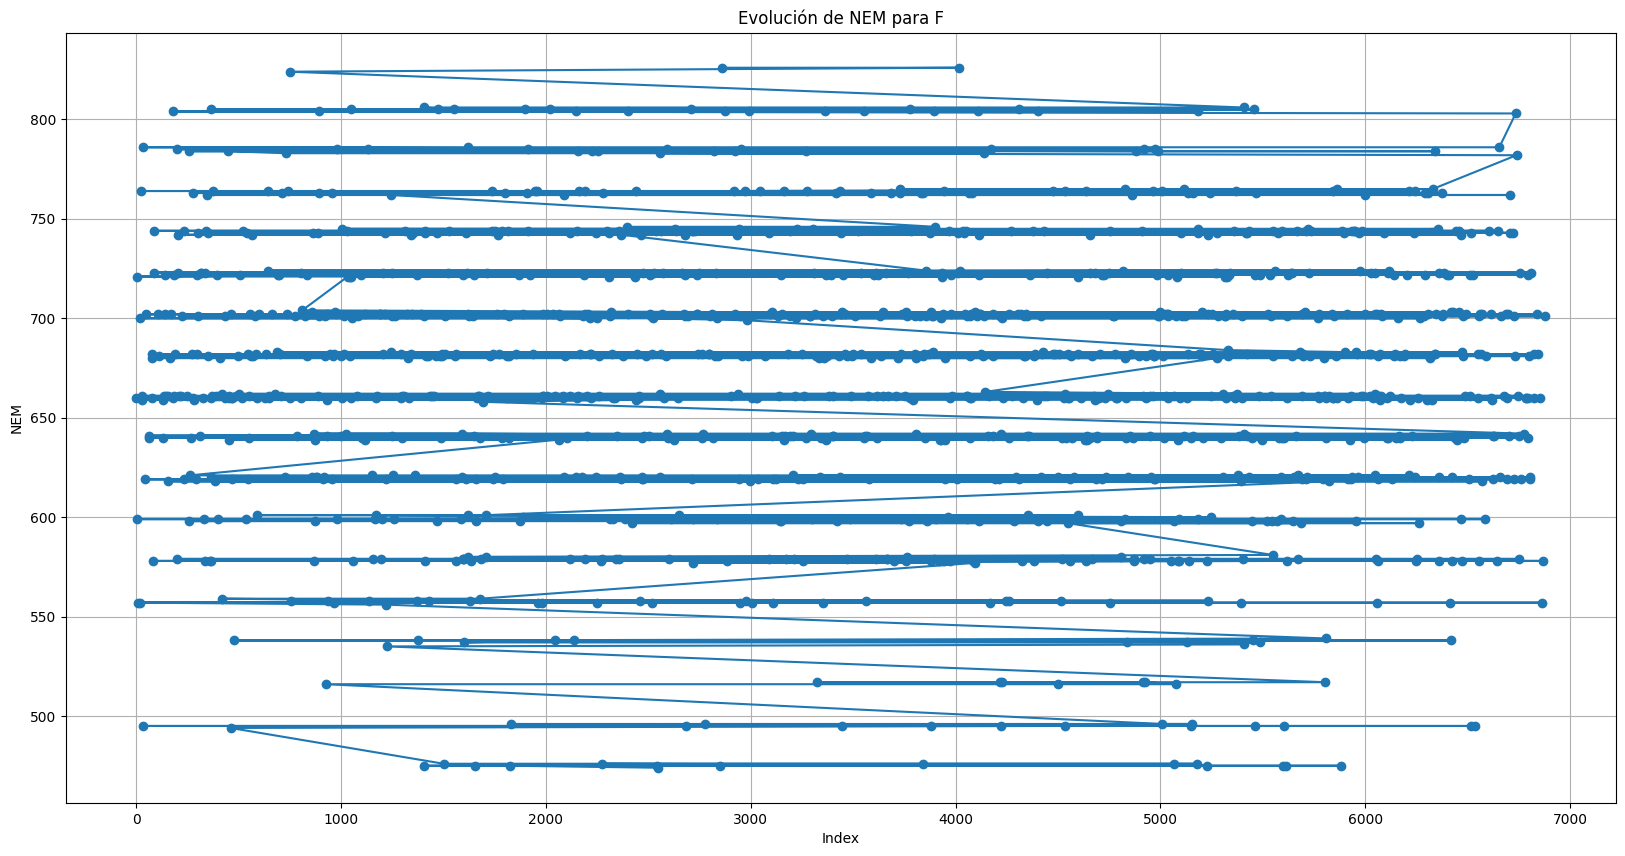

In [74]:
def MostrarEvolucionCategoriaNumerica3(CategoriaNumerica, ItemValue):
    # Filtrar los datos para la siguiente categoría
    filtered_data = data[data["Sexo"] == ItemValue]

    # Ordenando los valores
    sorted_data = filtered_data.sort_values(by=CategoriaNumerica)

    # Estableciendo y dibujando gráfico
    plt.figure(figsize=(20, 10))

    plt.plot(sorted_data.index, sorted_data[CategoriaNumerica], marker='o')

    plt.title(f'Evolución de {CategoriaNumerica} para {ItemValue}')
    plt.xlabel('Index')
    plt.ylabel(CategoriaNumerica)
    plt.grid(True)
    plt.show()

# Llamando la función con las siguientes categorías:
MostrarEvolucionCategoriaNumerica3("Nota", "M")
MostrarEvolucionCategoriaNumerica3("NEM", "F")


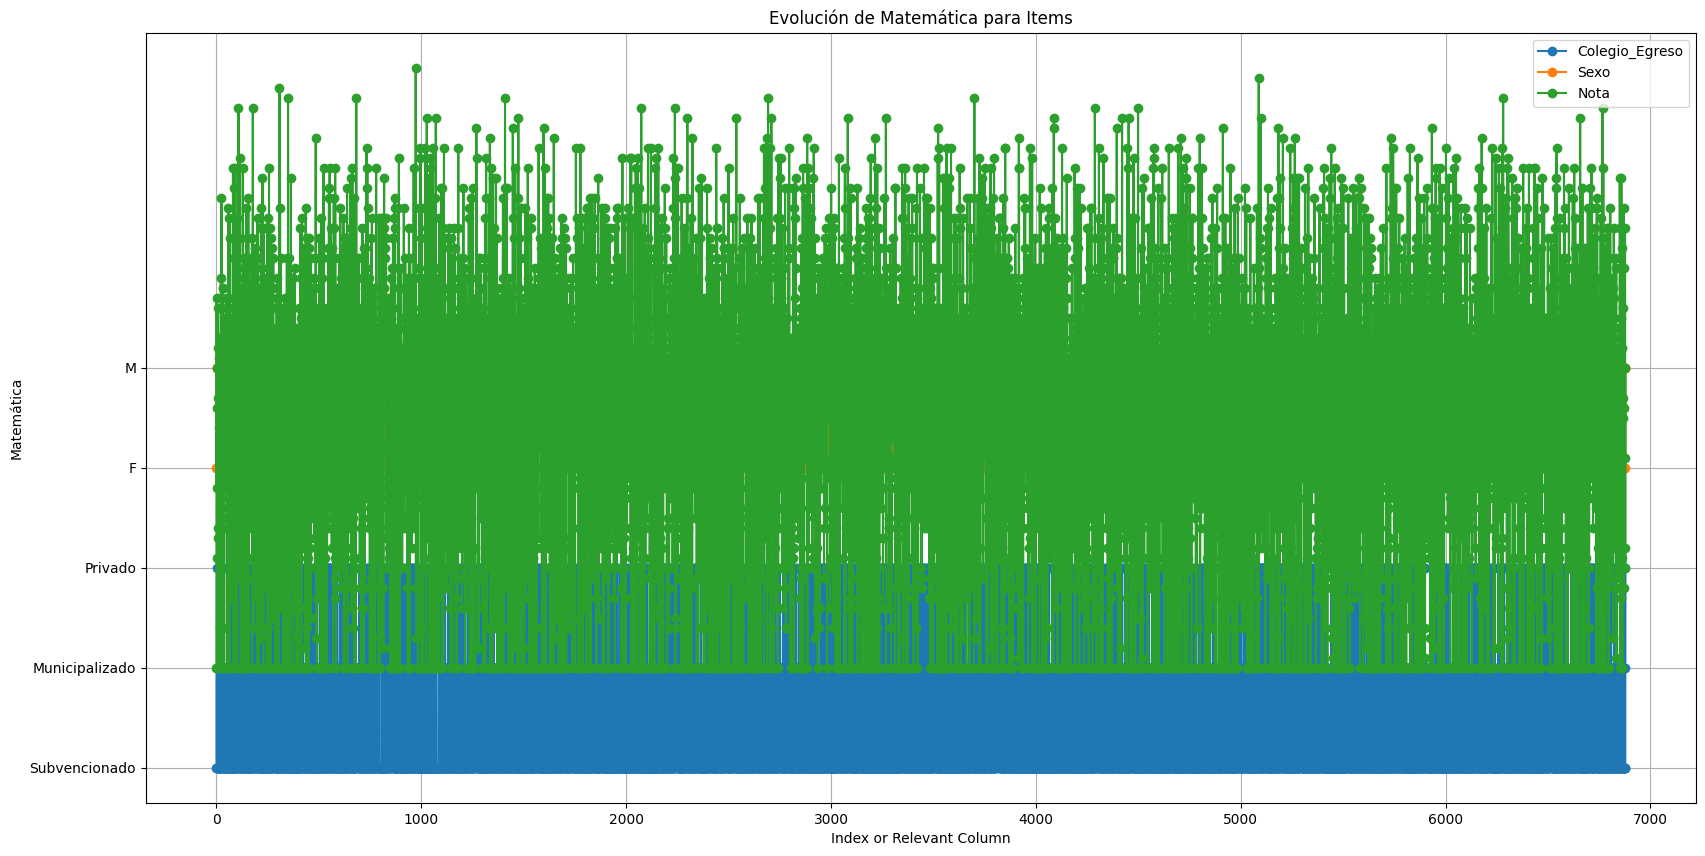

In [64]:
def MostrarEvolucionCategoriaNumericaComparativa(CategoriaNumerica, Items):
    # seleccionando data
    selected_data = data.loc[:, [CategoriaNumerica] + Items]

    # Estableciendo el gráfico
    plt.figure(figsize=(20, 10))

    for item in Items:
        plt.plot(selected_data.index, selected_data[item], label=item, marker='o')

    plt.title('Evolución de ' + CategoriaNumerica + ' para Items')
    plt.xlabel('ID')
    plt.ylabel(CategoriaNumerica)
    plt.legend()
    plt.grid(True)
    plt.show()

# creando el gráfico con los puntajes de matemática para tres categorías diferentes.
MostrarEvolucionCategoriaNumericaComparativa("Matemática", ["Colegio_Egreso", "Sexo", "Nota"])
